In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config.settings import DB_PATH

## Director Scores

In [2]:
query = """
WITH past_movie AS (
    SELECT 
        m.movie_id,
        mc1.person_id AS director_id, 
        pm.vote_average,
        pm.release_date AS prev_release_date,
        m.release_date AS current_release_date,
        JULIANDAY(m.release_date) - JULIANDAY(pm.release_date) AS days_difference
    FROM movie m
    JOIN movie_crew mc1 ON m.movie_id = mc1.movie_id  
    JOIN movie_crew mc2 ON mc1.person_id = mc2.person_id  
    JOIN movie pm ON mc2.movie_id = pm.movie_id  
    WHERE mc1.job IN ('Director', 'Co-Director') 
      AND mc2.job IN ('Director', 'Co-Director')
      AND pm.release_date < m.release_date
      AND pm.vote_count >= 30  
)
SELECT 
    m.movie_id, 
    m.vote_average,
    COALESCE(
        SUM(pm.vote_average * EXP(-? * days_difference)) / 
        SUM(EXP(-? * days_difference)), 
        (SELECT AVG(vote_average) FROM movie WHERE vote_count >= 30)  
    ) AS director_score
FROM movie m
LEFT JOIN past_movie pm ON m.movie_id = pm.movie_id
WHERE m.vote_count >= 30
GROUP BY m.movie_id;
"""

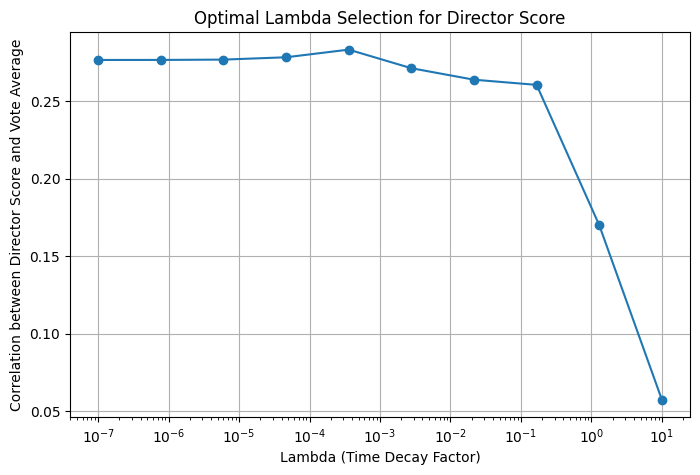

In [3]:
# Define lambda values to test
lambda_values = np.logspace(-7, 1, 10)  # initial lambda range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["director_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Director Score and Vote Average")
plt.title("Optimal Lambda Selection for Director Score")
plt.grid(True)
plt.show()


### Enhance: zoom in to find a better lambda

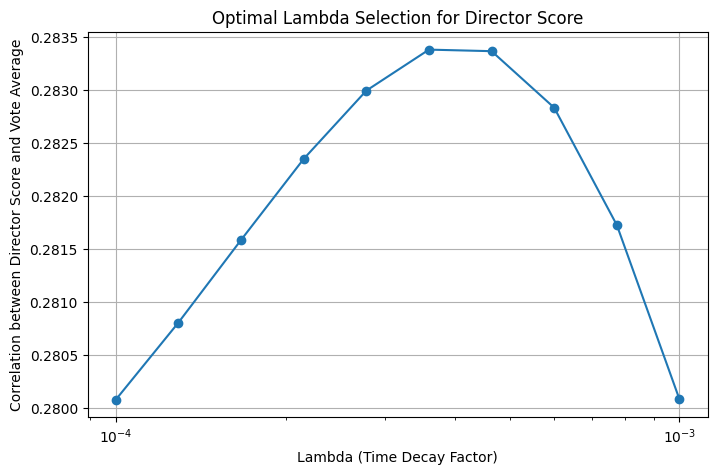

In [4]:
# Adjusted lambda values to test
lambda_values = np.logspace(-4, -3, 10)  # Adjusting lambdas based on graph above

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["director_score"])
        correlations.append(corr)


# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Director Score and Vote Average")
plt.title("Optimal Lambda Selection for Director Score")
plt.grid(True)
plt.show()

### Enhance...

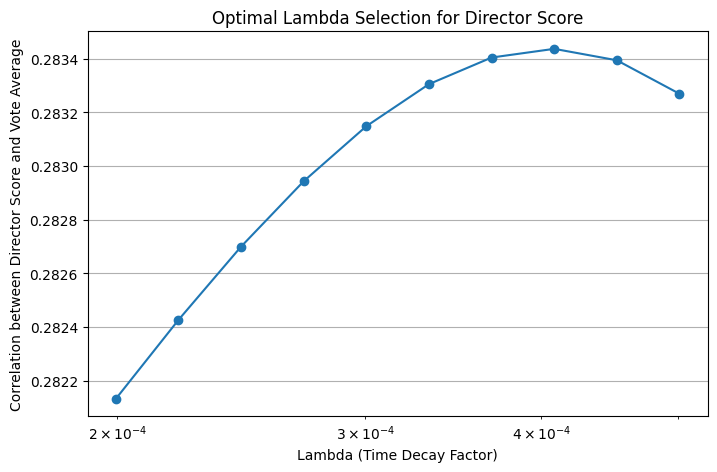

In [7]:
# Adjusted lambda values to test
lambda_values = np.logspace(-3.7, -3.3, 10)  # Adjusting lambdas based on graph above

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["director_score"])
        correlations.append(corr)


# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Director Score and Vote Average")
plt.title("Optimal Lambda Selection for Director Score")
plt.grid(True)
plt.show()

### Enhance...

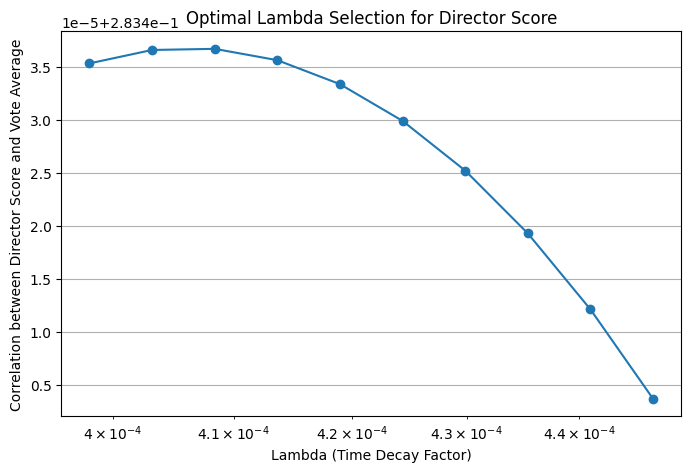

In [10]:
# Adjusted lambda values to test
lambda_values = np.logspace(-3.4, -3.35, 10)  # Adjusting lambdas based on graph above

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["director_score"])
        correlations.append(corr)


# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Director Score and Vote Average")
plt.title("Optimal Lambda Selection for Director Score")
plt.grid(True)
plt.show()

### Enough enhancing: final choice of $\lambda$ for director

It looks like setting $$\lambda=4.08\times 10^{-4}=0.000408\quad(\text{for director})$$ will roughly optimize the correlation between the director score and the vote average, so let's go with that. 

## Writers

In [101]:
query = """
WITH past_movie AS (
    SELECT 
        m.movie_id,
        mc1.person_id AS director_id, 
        pm.vote_average,
        pm.release_date AS prev_release_date,
        m.release_date AS current_release_date,
        JULIANDAY(m.release_date) - JULIANDAY(pm.release_date) AS days_difference
    FROM movie m
    JOIN movie_crew mc1 ON m.movie_id = mc1.movie_id  
    JOIN movie_crew mc2 ON mc1.person_id = mc2.person_id  
    JOIN movie pm ON mc2.movie_id = pm.movie_id  
    WHERE mc1.department = 'Writing' 
      AND mc2.department = 'Writing'
      AND pm.release_date < m.release_date
      AND pm.vote_count >= 30  
)
SELECT 
    m.movie_id, 
    m.vote_average,
    COALESCE(
        SUM(pm.vote_average * EXP(-? * days_difference)) / 
        SUM(EXP(-? * days_difference)), 
        (SELECT AVG(vote_average) FROM movie WHERE vote_count >= 30)  
    ) AS writers_score
FROM movie m
LEFT JOIN past_movie pm ON m.movie_id = pm.movie_id
WHERE m.vote_count >= 30
GROUP BY m.movie_id;
"""

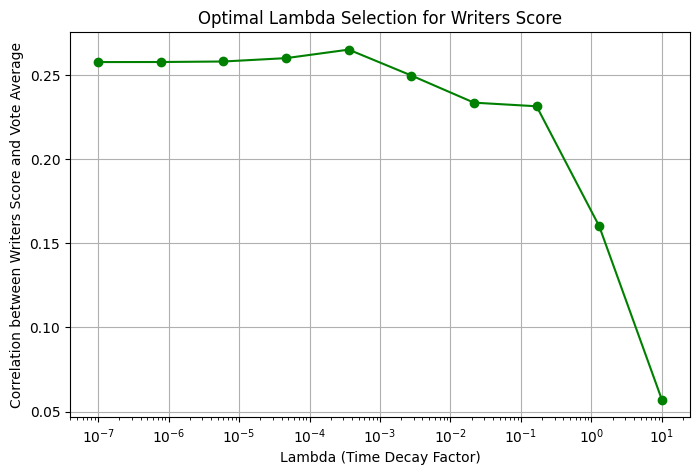

In [103]:
# Define lambda values to test
lambda_values = np.logspace(-7, 1, 10)  # initial lambda range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["writers_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-', color='green')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Writers Score and Vote Average")
plt.title("Optimal Lambda Selection for Writers Score")
plt.grid(True)
plt.show()

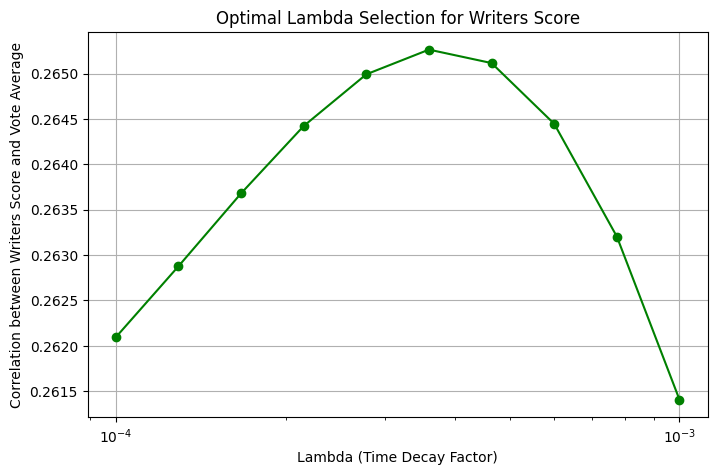

In [104]:
# Define lambda values to test
lambda_values = np.logspace(-4, -3, 10)  # initial lambda range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["writers_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-', color='green')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Writers Score and Vote Average")
plt.title("Optimal Lambda Selection for Writers Score")
plt.grid(True)
plt.show()

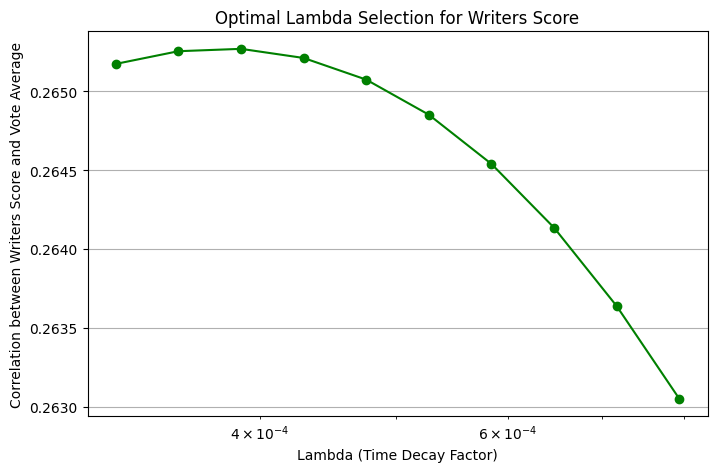

In [105]:
# Define lambda values to test
lambda_values = np.logspace(-3.5, -3.1, 10)  # initial lambda range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["writers_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-', color='green')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Writers Score and Vote Average")
plt.title("Optimal Lambda Selection for Writers Score")
plt.grid(True)
plt.show()

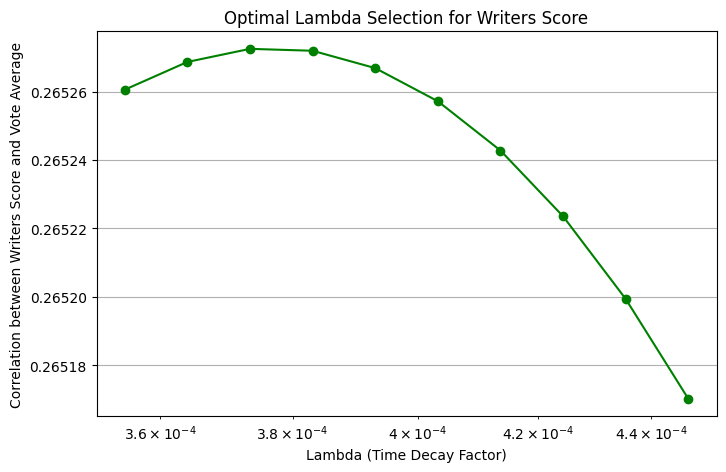

In [106]:
# Define lambda values to test
lambda_values = np.logspace(-3.45, -3.35, 10)  # initial lambda range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["writers_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-', color='green')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Writers Score and Vote Average")
plt.title("Optimal Lambda Selection for Writers Score")
plt.grid(True)
plt.show()

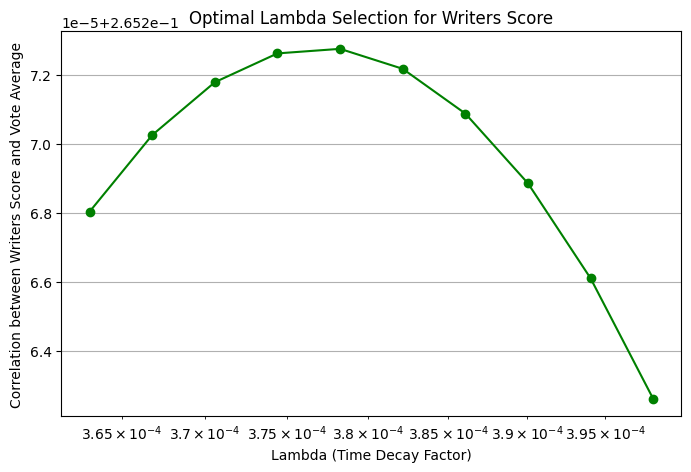

In [107]:
# Define lambda values to test
lambda_values = np.logspace(-3.44, -3.4, 10)  # initial lambda range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda values
    for lambda_val in lambda_values:
        df = pd.read_sql_query(query, conn, params=[lambda_val, lambda_val])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["writers_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, correlations, marker='o', linestyle='-', color='green')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda (Time Decay Factor)")
plt.ylabel("Correlation between Writers Score and Vote Average")
plt.title("Optimal Lambda Selection for Writers Score")
plt.grid(True)
plt.show()

### Final choice for writers' $\lambda$

It looks like setting $$\quad\lambda=3.77\times 10^{-4}=0.000377 \quad(\text{for writers})$$ will roughly optimize the correlation between the writers score and the vote average. 

## Cast Score

In [17]:
query = """
WITH RelevantCast AS (
    -- Get top 10 cast members per movie (or fewer if there are fewer cast members)
    SELECT mc.movie_id, mc.person_id, mc.cast_order, m.release_date, m.vote_average
    FROM movie_cast mc
    JOIN movie m ON mc.movie_id = m.movie_id
    WHERE mc.cast_order <= 10 -- Consider only the top 10 billed actors
),
CastHistory AS (
    -- Join movies with their past appearances of cast members
    SELECT 
        m.movie_id,
        prev_m.vote_average AS past_vote_average,
        JULIANDAY(m.release_date) - JULIANDAY(prev_m.release_date) AS days_difference,
        rc.cast_order
    FROM movie m
    JOIN RelevantCast rc ON m.movie_id = rc.movie_id
    JOIN movie_cast prev_mc ON rc.person_id = prev_mc.person_id
    JOIN movie prev_m ON prev_mc.movie_id = prev_m.movie_id
    WHERE prev_m.release_date < m.release_date -- Only use past movies
    AND prev_m.vote_count >= 30 -- Only consider past movies with enough votes
)
SELECT 
    m.movie_id,
    m.vote_average,
    CASE 
        WHEN SUM(EXP(-? * days_difference) * EXP(-? * cast_order)) = 0 
        THEN NULL
        ELSE SUM(past_vote_average * EXP(-? * days_difference) * EXP(-? * cast_order)) / 
             SUM(EXP(-? * days_difference) * EXP(-? * cast_order))
    END AS cast_score
FROM CastHistory
JOIN movie m ON CastHistory.movie_id = m.movie_id
WHERE m.vote_count >= 30
GROUP BY m.movie_id;
"""

In [18]:
# Set up lambda values for grid search using logarithmic spacing
lambda_times = np.logspace(-6, -2, 5)  # initial lambda_time range
lambda_orders = np.logspace(-7, 0, 5)  # initial lambda_order range

# Initialize a DataFrame to store correlations
correlation_matrix = np.zeros((len(lambda_times), len(lambda_orders)))

# Loop over the grid of lambda values and compute correlations
for i, lambda_time in enumerate(lambda_times):
    for j, lambda_order in enumerate(lambda_orders):
        # Execute query with parameters
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation between cast_score and vote_average
        correlation = df['cast_score'].corr(df['vote_average'])
        
        # Store the result in the matrix
        correlation_matrix[i, j] = correlation

In [19]:
print("NaN values in correlation matrix:", np.isnan(correlation_matrix).sum())

NaN values in correlation matrix: 0


In [20]:
correlation_matrix

array([[0.39900817, 0.39900845, 0.39902378, 0.39980691, 0.36795114],
       [0.40083775, 0.40083803, 0.40085338, 0.40163694, 0.36930602],
       [0.41520363, 0.41520391, 0.4152196 , 0.41601685, 0.38079924],
       [0.42982999, 0.42983035, 0.42985042, 0.43089278, 0.4004261 ],
       [0.31484668, 0.31484693, 0.31486081, 0.31561192, 0.31613368]])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27186 entries, 0 to 27185
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      27186 non-null  int64  
 1   vote_average  27186 non-null  float64
 2   cast_score    27186 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 637.3 KB


In [22]:
df.head(50)

,movie_id,vote_average,cast_score
0,5,5.858,6.422095
1,6,6.500,5.827322
2,11,8.200,6.085874
3,12,7.817,5.609081
4,13,8.468,7.513383
5,14,8.009,6.470266
6,15,8.000,7.424151
7,16,7.900,6.408643
8,17,5.700,7.014623
9,18,7.600,6.561605


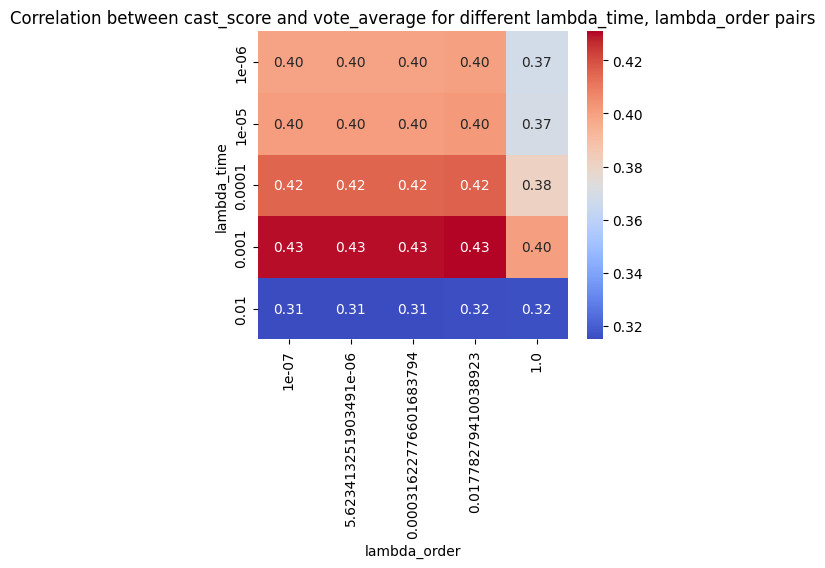

In [25]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

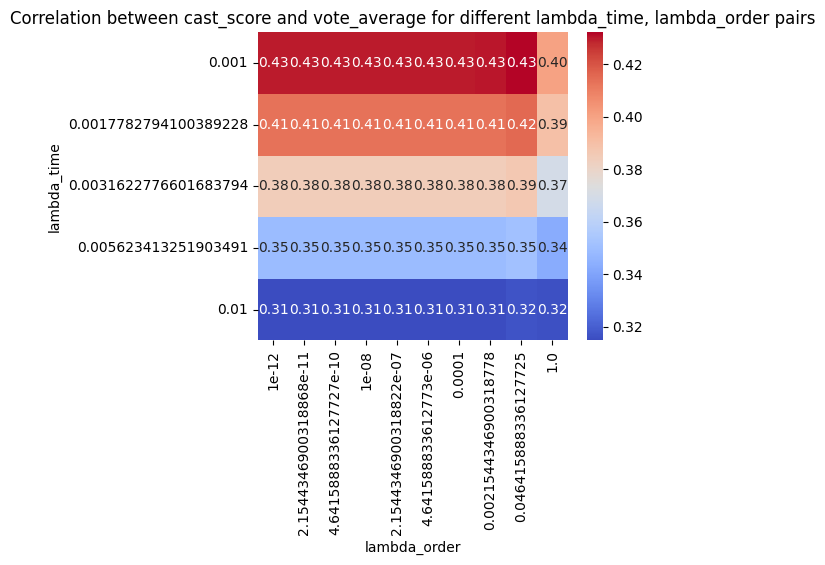

In [27]:
# Set up lambda values for grid search using logarithmic spacing
lambda_times = np.logspace(-3, -2, 5)  # initial lambda_time range
lambda_orders = np.logspace(-12, 0, 10)  # initial lambda_order range

# Initialize a DataFrame to store correlations
correlation_matrix = np.zeros((len(lambda_times), len(lambda_orders)))

# Loop over the grid of lambda values and compute correlations
for i, lambda_time in enumerate(lambda_times):
    for j, lambda_order in enumerate(lambda_orders):
        # Execute query with parameters
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation between cast_score and vote_average
        correlation = df['cast_score'].corr(df['vote_average'])
        
        # Store the result in the matrix
        correlation_matrix[i, j] = correlation

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

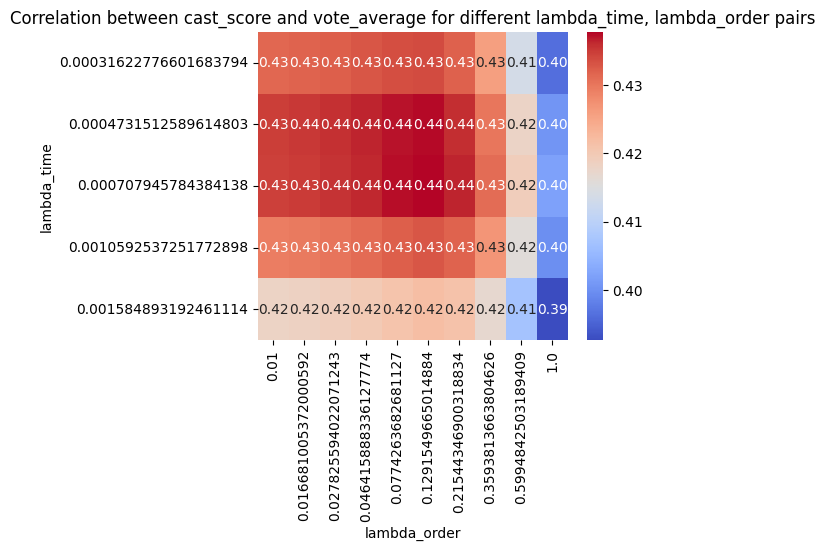

In [28]:
# Set up lambda values for grid search using logarithmic spacing
lambda_times = np.logspace(-3.5, -2.8, 5)  # initial lambda_time range
lambda_orders = np.logspace(-2, 0, 10)  # initial lambda_order range

# Initialize a DataFrame to store correlations
correlation_matrix = np.zeros((len(lambda_times), len(lambda_orders)))

# Loop over the grid of lambda values and compute correlations
for i, lambda_time in enumerate(lambda_times):
    for j, lambda_order in enumerate(lambda_orders):
        # Execute query with parameters
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation between cast_score and vote_average
        correlation = df['cast_score'].corr(df['vote_average'])
        
        # Store the result in the matrix
        correlation_matrix[i, j] = correlation

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

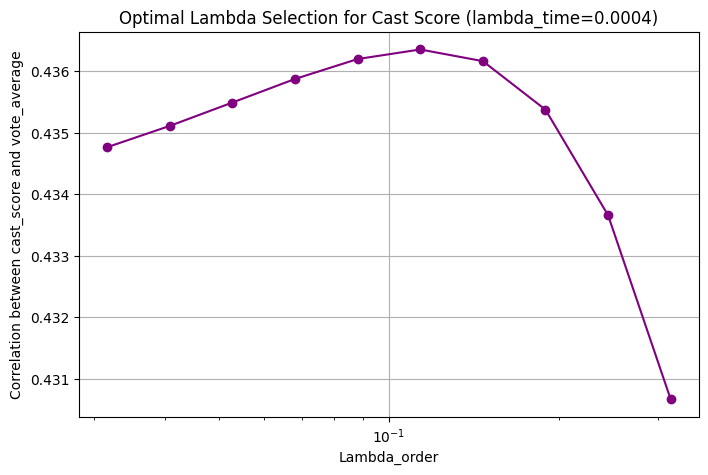

In [31]:
lambda_time = 0.0004
lambda_orders = np.logspace(-1.5, -0.5, 10)  # initial lambda_order range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda_order values
    for lambda_order in lambda_orders:
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["cast_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_orders, correlations, marker='o', linestyle='-', color='purple')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Lambda_order")
plt.ylabel("Correlation between cast_score and vote_average")
plt.title("Optimal Lambda Selection for Cast Score (lambda_time=0.0004)")
plt.grid(True)
plt.show()

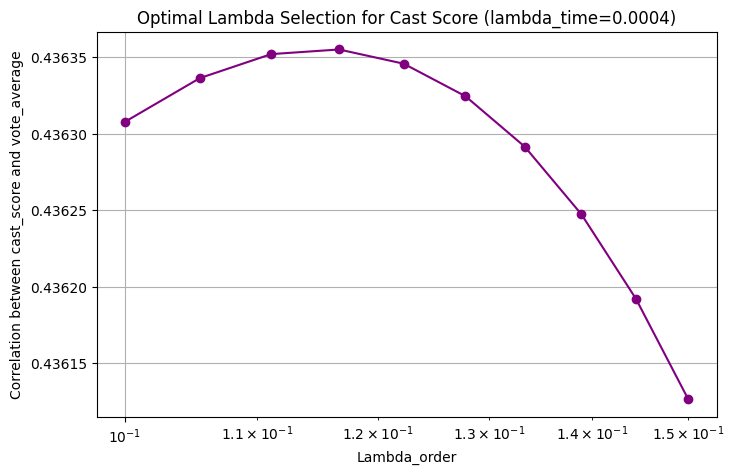

In [33]:
lambda_time = 0.0004
lambda_orders = np.linspace(0.1, 0.15, 10)  # initial lambda_order range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda_order values
    for lambda_order in lambda_orders:
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["cast_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_orders, correlations, marker='o', linestyle='-', color='purple')
plt.xlabel("Lambda_order")
plt.ylabel("Correlation between cast_score and vote_average")
plt.title("Optimal Lambda Selection for Cast Score (lambda_time=0.0004)")
plt.grid(True)
plt.show()

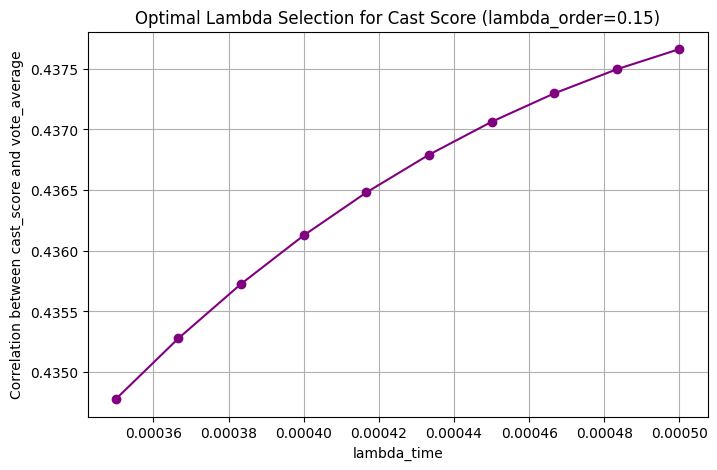

In [35]:
lambda_order = 0.15
lambda_times = np.linspace(0.00035, 0.0005, 10)  # initial lambda_time range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda_order values
    for lambda_time in lambda_times:
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["cast_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_times, correlations, marker='o', linestyle='-', color='purple')
plt.xlabel("lambda_time")
plt.ylabel("Correlation between cast_score and vote_average")
plt.title("Optimal Lambda Selection for Cast Score (lambda_order=0.15)")
plt.grid(True)
plt.show()

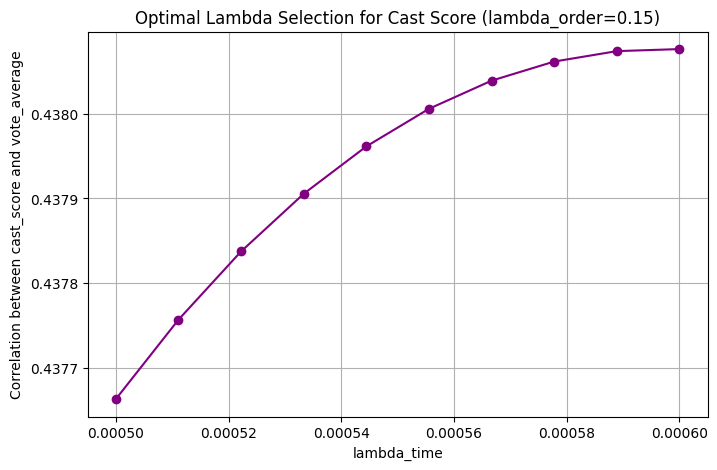

In [36]:
lambda_order = 0.15
lambda_times = np.linspace(0.0005, 0.0006, 10)  # initial lambda_time range

correlations = []  # Store correlation results

with sqlite3.connect(DB_PATH) as conn:
    # Loop through lambda_order values
    for lambda_time in lambda_times:
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation
        corr = df["vote_average"].corr(df["cast_score"])
        correlations.append(corr)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lambda_times, correlations, marker='o', linestyle='-', color='purple')
plt.xlabel("lambda_time")
plt.ylabel("Correlation between cast_score and vote_average")
plt.title("Optimal Lambda Selection for Cast Score (lambda_order=0.15)")
plt.grid(True)
plt.show()

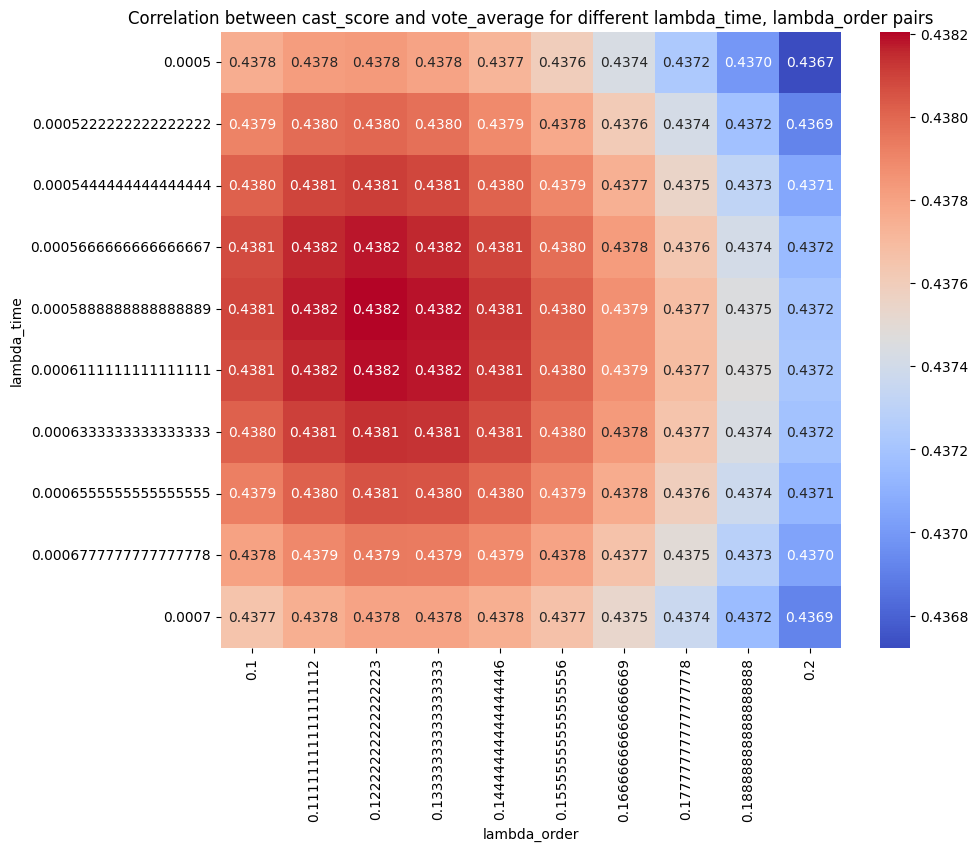

In [37]:
# Set up lambda values for grid search
lambda_times = np.linspace(0.0005, 0.0007, 10) 
lambda_orders = np.linspace(0.1, 0.2, 10)  

# Initialize a DataFrame to store correlations
correlation_matrix = np.zeros((len(lambda_times), len(lambda_orders)))

# Loop over the grid of lambda values and compute correlations
for i, lambda_time in enumerate(lambda_times):
    for j, lambda_order in enumerate(lambda_orders):
        # Execute query with parameters
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation between cast_score and vote_average
        correlation = df['cast_score'].corr(df['vote_average'])
        
        # Store the result in the matrix
        correlation_matrix[i, j] = correlation

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".5f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

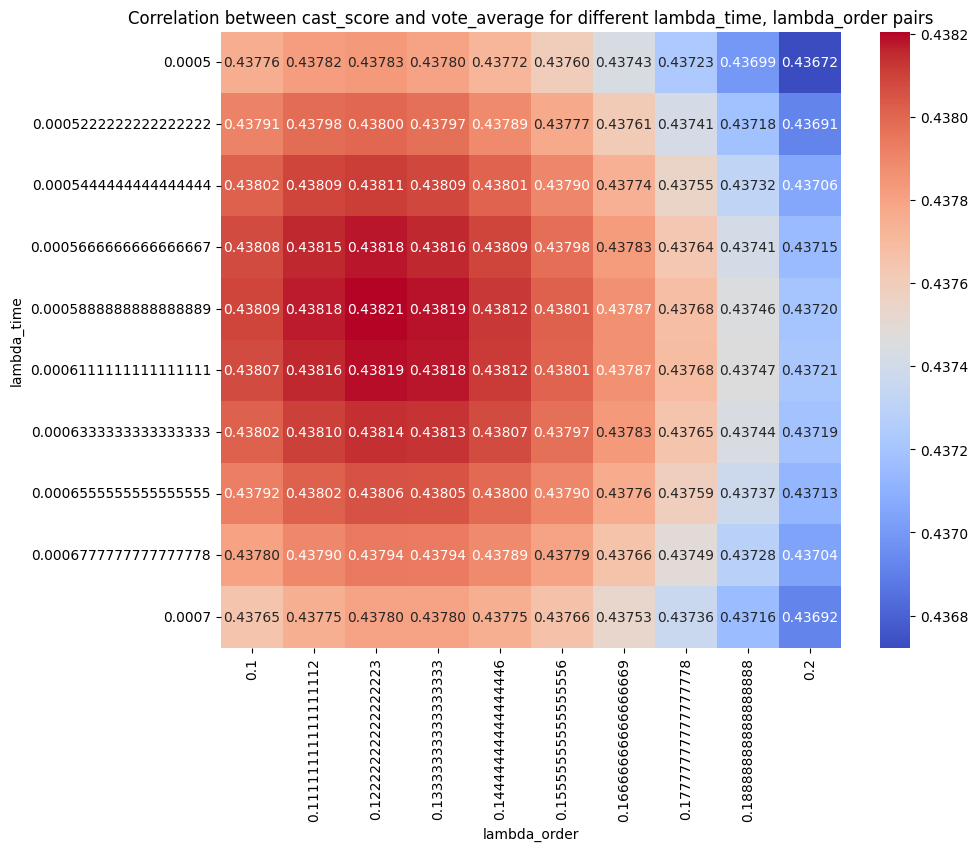

In [39]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".5f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

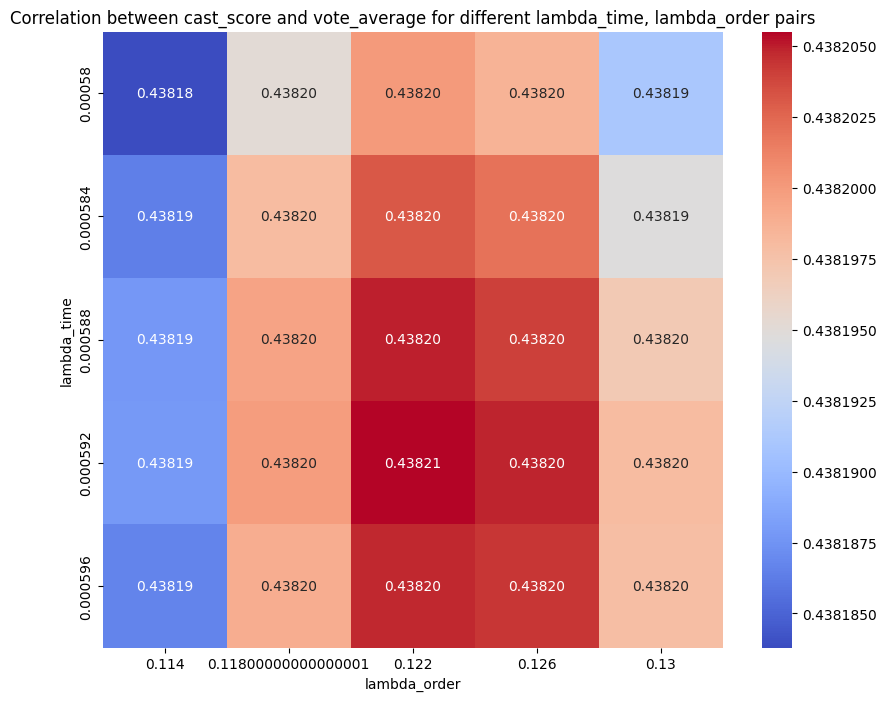

In [40]:
# Set up lambda values for grid search
lambda_times = np.linspace(0.00058, 0.000596, 5) 
lambda_orders = np.linspace(0.114, 0.13, 5)  

# Initialize a DataFrame to store correlations
correlation_matrix = np.zeros((len(lambda_times), len(lambda_orders)))

# Loop over the grid of lambda values and compute correlations
for i, lambda_time in enumerate(lambda_times):
    for j, lambda_order in enumerate(lambda_orders):
        # Execute query with parameters
        df = pd.read_sql_query(query, conn, params=[lambda_time, lambda_order, lambda_time, lambda_order, lambda_time, lambda_order])
        
        # Compute correlation between cast_score and vote_average
        correlation = df['cast_score'].corr(df['vote_average'])
        
        # Store the result in the matrix
        correlation_matrix[i, j] = correlation

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".5f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

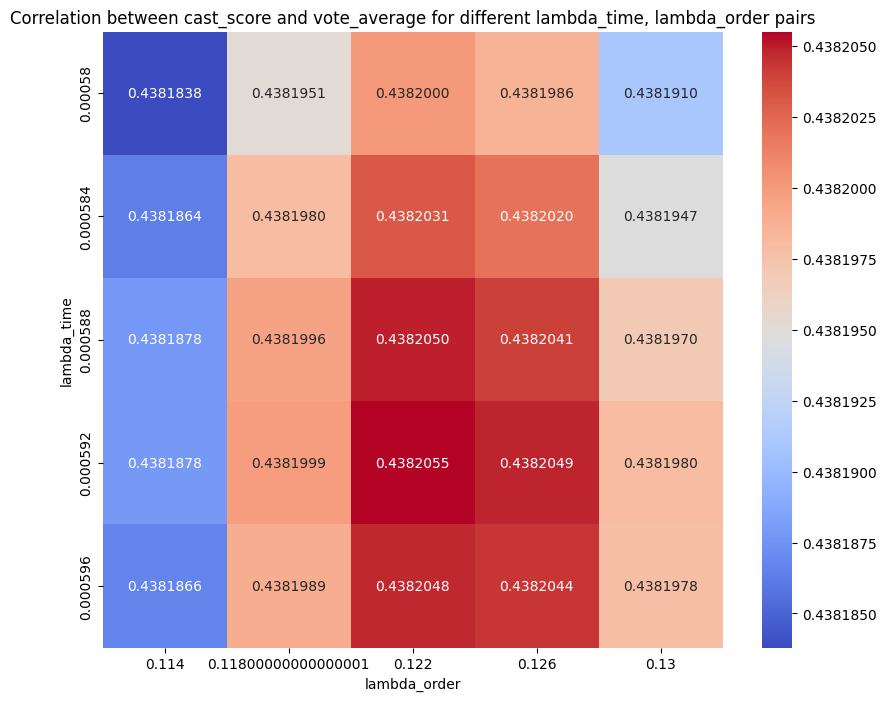

In [41]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, xticklabels=lambda_orders, yticklabels=lambda_times, cmap='coolwarm', annot=True, fmt=".7f")
plt.xlabel('lambda_order')
plt.ylabel('lambda_time')
plt.title('Correlation between cast_score and vote_average for different lambda_time, lambda_order pairs')
plt.show()

Looks like some good parameters are $\lambda_{o}=0.122$ and $\lambda_{t}=0.000592$.

## Production Company Score

In [50]:
query = """
WITH PastMovies AS (
    -- Get past movies with the same production company
    SELECT 
        m.movie_id,
        prev_mpc.company_id,
        prev_m.vote_average
    FROM movie m
    JOIN movie_production_company mpc ON m.movie_id = mpc.movie_id
    JOIN movie_production_company prev_mpc ON mpc.company_id = prev_mpc.company_id
    JOIN movie prev_m ON prev_mpc.movie_id = prev_m.movie_id
    WHERE prev_m.release_date < m.release_date
    AND prev_m.vote_count >= 30
),
CompanyAverages AS (
    -- Compute the average vote_average per production company
    SELECT 
        company_id,
        AVG(vote_average) AS company_avg_vote
    FROM PastMovies
    GROUP BY company_id
),
OverallAverage AS (
    -- Compute the overall average vote_average for all movies with enough votes
    SELECT AVG(vote_average) AS overall_avg_vote
    FROM movie
    WHERE vote_count >= 30
)
SELECT 
    m.movie_id,
    m.vote_average,
    COALESCE(company_avg_vote, overall_avg_vote) AS production_company_score
FROM movie m
LEFT JOIN movie_production_company mpc ON m.movie_id = mpc.movie_id
LEFT JOIN CompanyAverages ca ON mpc.company_id = ca.company_id
CROSS JOIN OverallAverage
WHERE m.vote_count >= 30
GROUP BY m.movie_id;
"""

In [51]:
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query(query, conn)
    print(df.head())


   movie_id  vote_average  production_company_score
0         2         7.113                  6.756194
1         3         7.300                  6.756194
2         5         5.858                  6.299657
3         6         6.500                  6.357698
4        11         8.200                  6.721258


In [53]:
print(df['production_company_score'].corr(df['vote_average']))

0.5260222735278464


## Putting all the scores together in one DataFrame 

In [54]:
# Setting all the parameters
lambda_director   = 0.000408
lambda_writers    = 0.000377
lambda_cast_time  = 0.000592
lambda_cast_order = 0.122